1. Setting Up Environment

In [1]:
!pip install numpy pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable


2. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

3. Loading the Dataset

In [3]:
# Load the dataset from the specified location
df = pd.read_csv(r"C:\Users\adity\Downloads\mymoviedb (1).csv")  # Use raw string notation

# View the first 5 rows of the dataset
print(df.head())

  Release_Date                    Title  \
0   2021-12-15  Spider-Man: No Way Home   
1   2022-03-01               The Batman   
2   2022-02-25                  No Exit   
3   2021-11-24                  Encanto   
4   2021-12-22           The King's Man   

                                            Overview  Popularity  Vote_Count  \
0  Peter Parker is unmasked and no longer able to...    5083.954        8940   
1  In his second year of fighting crime, Batman u...    3827.658        1151   
2  Stranded at a rest stop in the mountains durin...    2618.087         122   
3  The tale of an extraordinary family, the Madri...    2402.201        5076   
4  As a collection of history's worst tyrants and...    1895.511        1793   

   Vote_Average Original_Language                               Genre  \
0           8.3                en  Action, Adventure, Science Fiction   
1           8.1                en            Crime, Mystery, Thriller   
2           6.3                en        

4. Check Dataset Information

In [6]:
# Check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


5. Check for Missing Values and Duplicates

In [7]:
# Check for missing values
print("Missing values:\n", df.isna().sum())

# Check for duplicated rows
print("Duplicated rows:", df.duplicated().sum())

Missing values:
 Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64
Duplicated rows: 0


6. Data Cleaning

6.1 Convert Release_Date to DateTime and Extract Year:

In [8]:
# Convert Release_Date to datetime and extract year
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
df['Release_Year'] = df['Release_Date'].dt.year

6.2 Drop Unnecessary Columns:

In [9]:
# Drop columns that are not useful for analysis
cols = ['Overview', 'Original_Language', 'Poster_Url']
df.drop(cols, axis=1, inplace=True)

6.3 Categorize Vote_Average:

In [10]:
# Define labels for categorization
labels = ['not_popular', 'below_avg', 'average', 'popular']

# Function to categorize Vote_Average
def categorize_col(df, col, labels):
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    df[col] = pd.cut(df[col], edges, labels=labels, duplicates='drop')
    return df

# Categorize Vote_Average
categorize_col(df, 'Vote_Average', labels)

# Drop NaN values
df.dropna(inplace=True)

Handle Genre Column:

In [12]:
# Split genres into lists
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)

7. Exploratory Data Analysis (EDA)

7.1 Set Up Seaborn Style:

In [13]:
sns.set(style="whitegrid")

7.2 Visualize Genre Distribution:

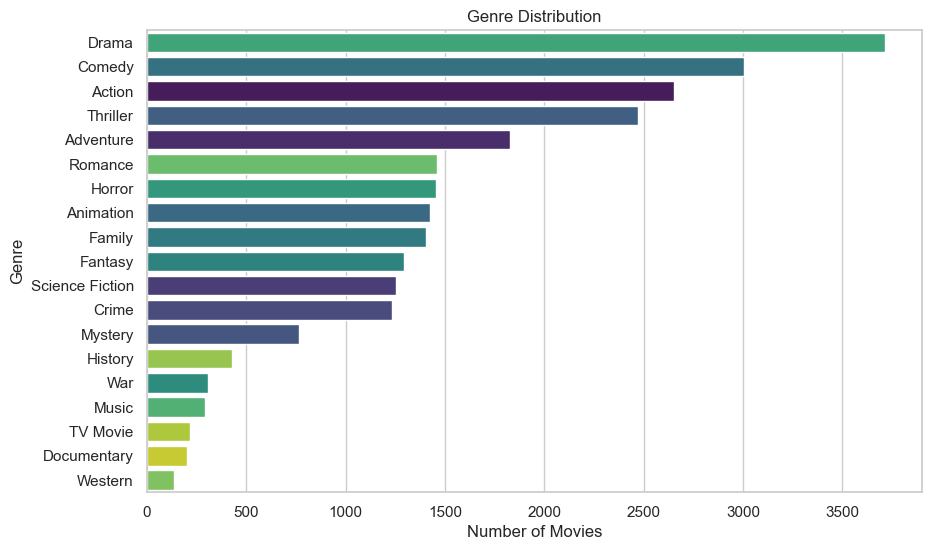

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Genre', data=df, order=df['Genre'].value_counts().index, palette='viridis', hue='Genre')
plt.title('Genre Distribution')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.legend([],[], frameon=False)  # Hide the legend since it's not needed
plt.show()

7.3 Visualize Vote Average Distribution:

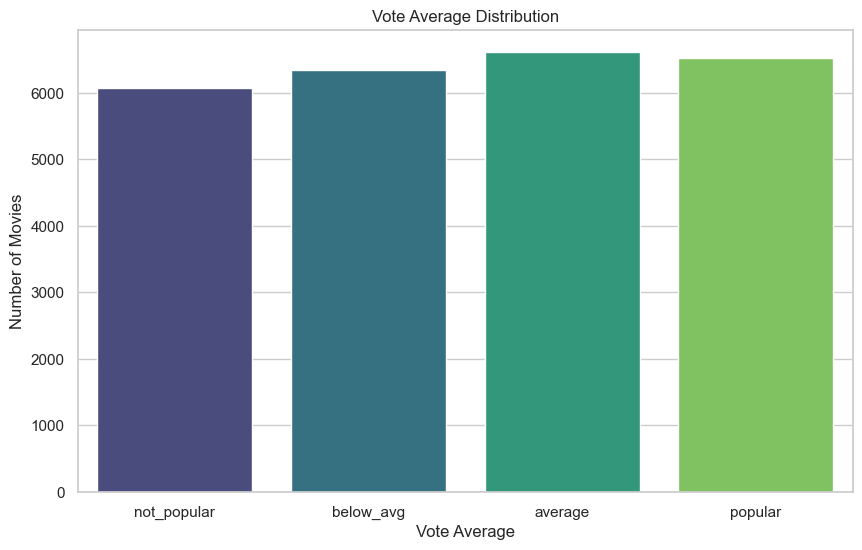

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Vote_Average', data=df, palette='viridis', hue='Vote_Average')
plt.title('Vote Average Distribution')
plt.xlabel('Vote Average')
plt.ylabel('Number of Movies')
plt.legend([],[], frameon=False)  # Hide the legend since it's not needed
plt.show()

7.4 Visualize Popularity Distribution:

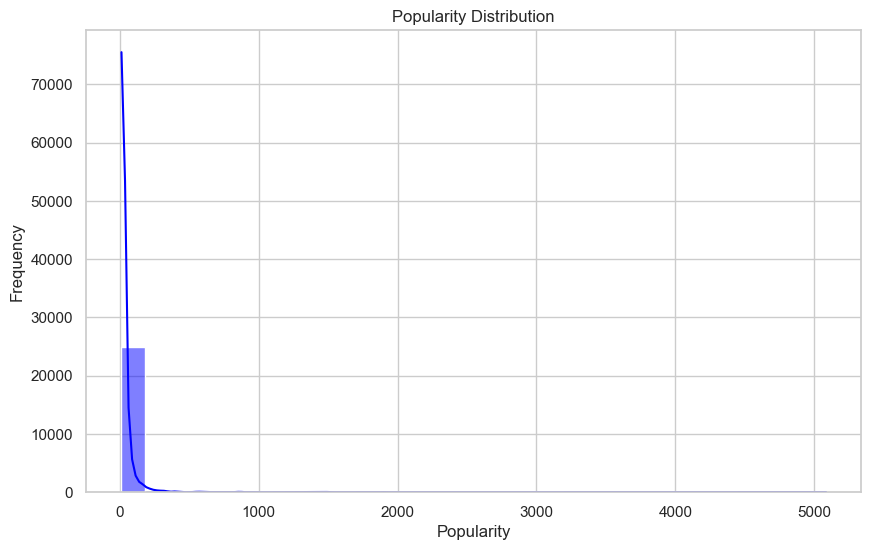

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=30, kde=True, color='blue')
plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

7.5 Find the Movie with Highest Popularity:

In [23]:
highest_popularity_movie = df[df['Popularity'] == df['Popularity'].max()]
print("Movie with Highest Popularity:\n", highest_popularity_movie[['Title', 'Popularity', 'Genre']])

Movie with Highest Popularity:
                      Title  Popularity            Genre
0  Spider-Man: No Way Home    5083.954           Action
1  Spider-Man: No Way Home    5083.954        Adventure
2  Spider-Man: No Way Home    5083.954  Science Fiction


7.6 Visualize Release Year Distribution:

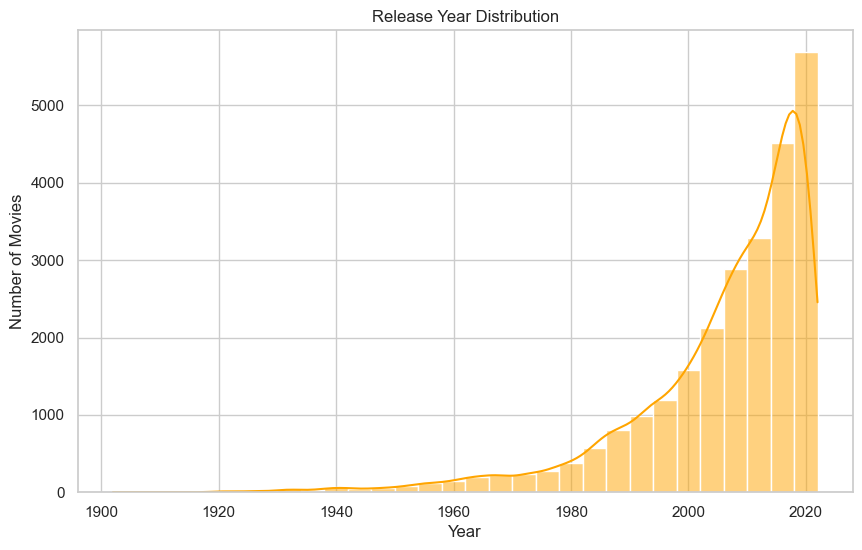

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Release_Year'], bins=30, kde=True, color='orange')
plt.title('Release Year Distribution')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

7.7 Analyze Popular Movies by Genre:

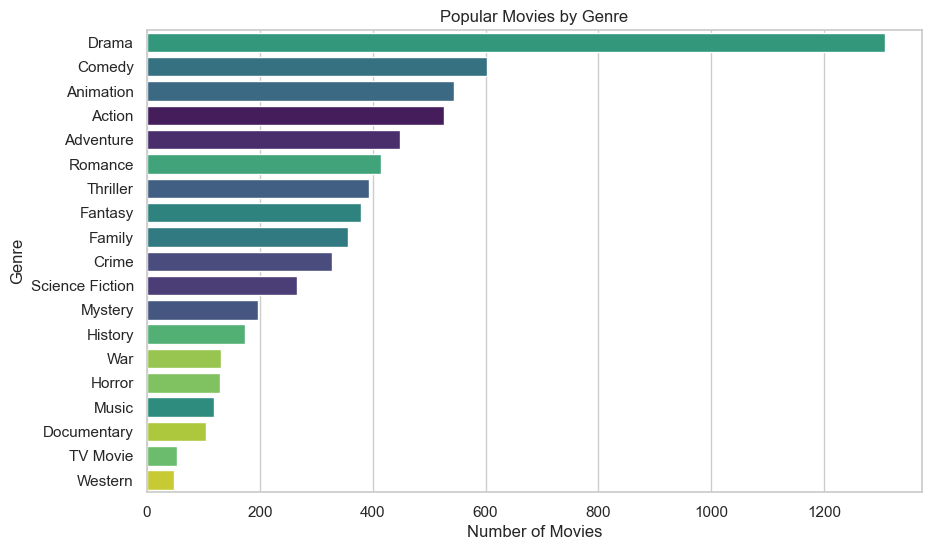

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Genre', data=popular_movies, order=popular_movies['Genre'].value_counts().index, palette='viridis', hue='Genre')
plt.title('Popular Movies by Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.legend([],[], frameon=False)  # Hide the legend since it's not needed
plt.show()

7.7 Analyze Votes by Genre:

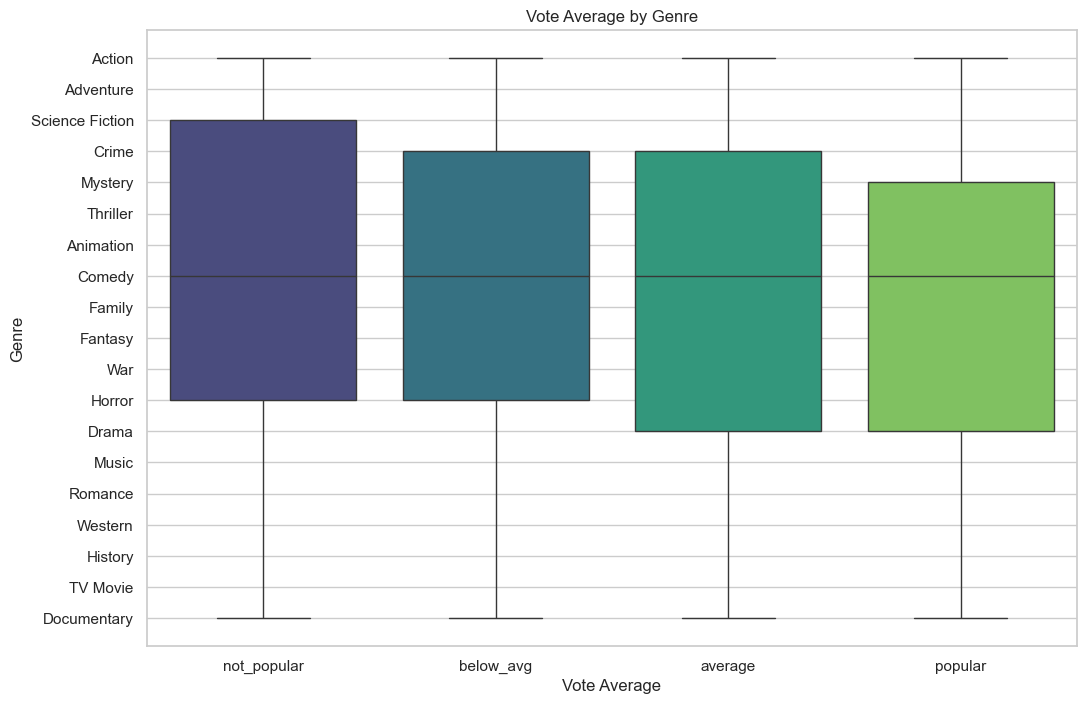

In [29]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Vote_Average', y='Genre', data=df, palette='viridis', hue='Vote_Average')
plt.title('Vote Average by Genre')
plt.xlabel('Vote Average')
plt.ylabel('Genre')
plt.legend([], [], frameon=False)  # Hide the legend since it's not needed
plt.show()

7.8 Analyze the Relationship Between Popularity and Vote Count:

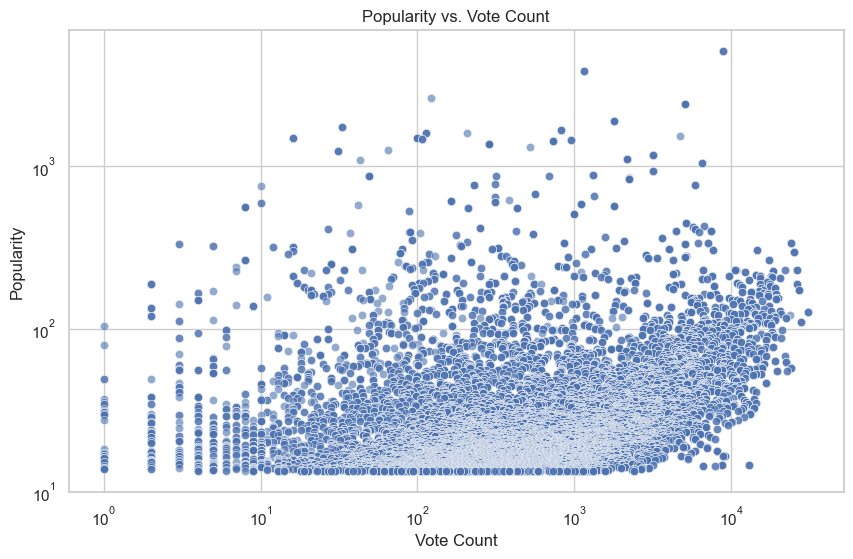

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Vote_Count', y='Popularity', data=df, alpha=0.6)
plt.title('Popularity vs. Vote Count')
plt.xlabel('Vote Count')
plt.ylabel('Popularity')
plt.xscale('log')  # Use log scale for better visualization
plt.yscale('log')  # Use log scale for better visualization
plt.show()

7.9 Analyze the Most Popular Movies:

In [31]:
top_popular_movies = df.nlargest(10, 'Popularity')
print("Top 10 Most Popular Movies:\n", top_popular_movies[['Title', 'Popularity', 'Genre']])

Top 10 Most Popular Movies:
                      Title  Popularity            Genre
0  Spider-Man: No Way Home    5083.954           Action
1  Spider-Man: No Way Home    5083.954        Adventure
2  Spider-Man: No Way Home    5083.954  Science Fiction
3               The Batman    3827.658            Crime
4               The Batman    3827.658          Mystery
5               The Batman    3827.658         Thriller
6                  No Exit    2618.087         Thriller
7                  Encanto    2402.201        Animation
8                  Encanto    2402.201           Comedy
9                  Encanto    2402.201           Family


8. Additional Insights and Visualizations

8.1 Correlation Analysis: Check for correlations between numerical features.

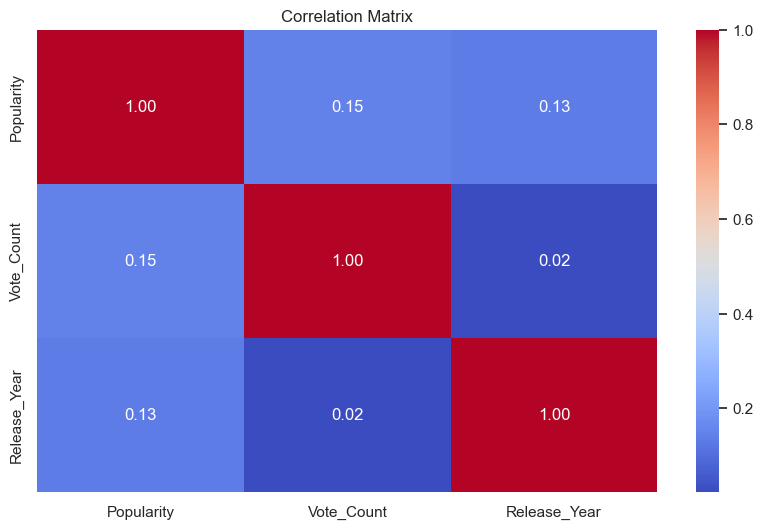

In [33]:
# Step 1: Identify numeric columns
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns

# Step 2: Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Step 3: Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

8.2 Trend Analysis Over Years: Analyze how the number of movies released has changed over the years.

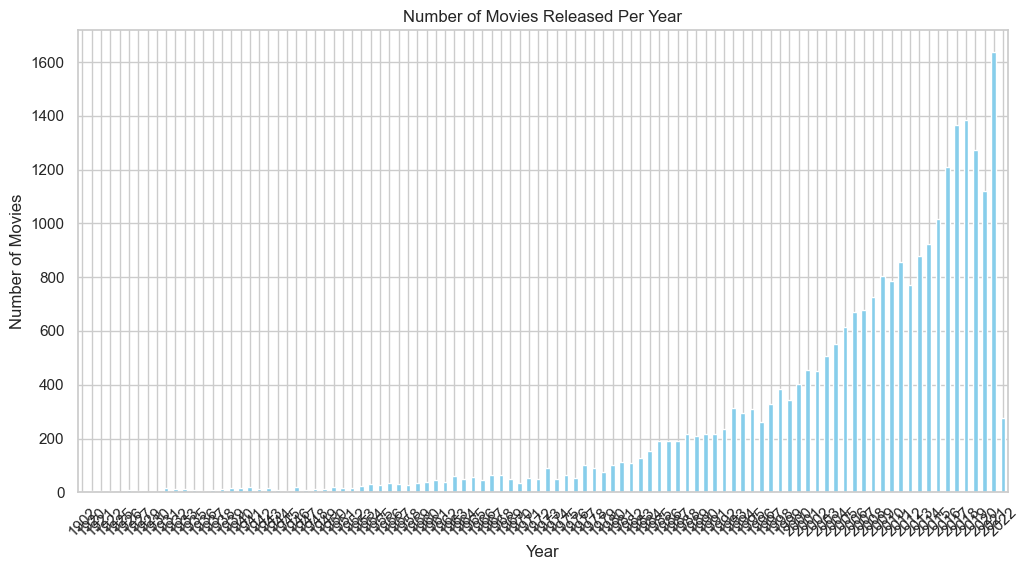

In [34]:
movies_per_year = df['Release_Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
movies_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

8.3 Top Genres Over the Years: Analyze which genres have been most popular over the years.

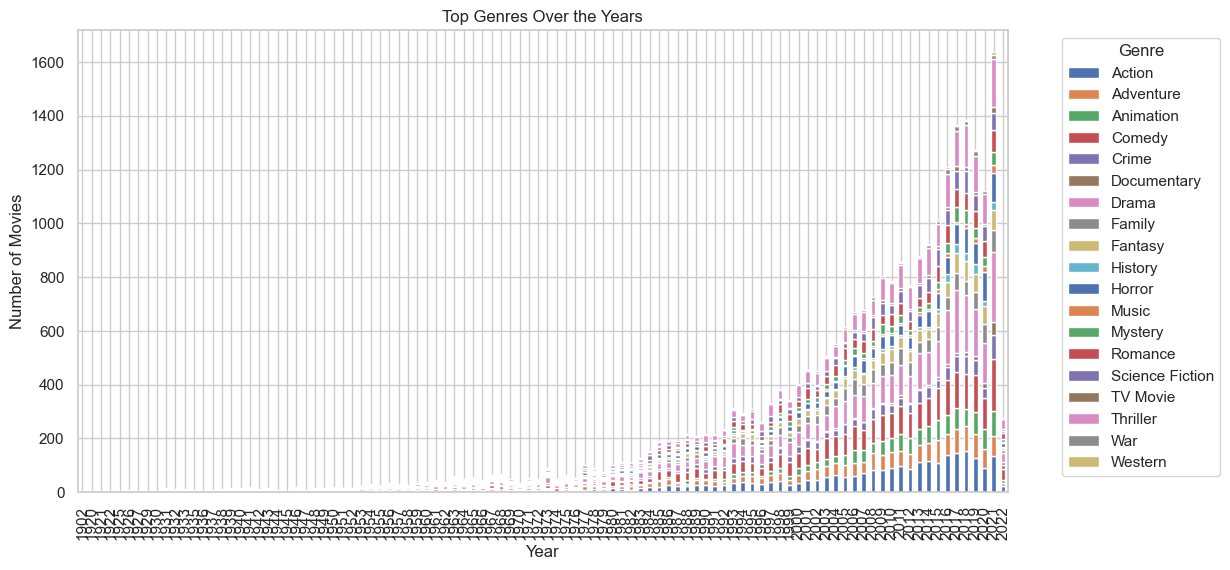

In [35]:
top_genres_over_years = df.groupby(['Release_Year', 'Genre']).size().unstack().fillna(0)
top_genres_over_years.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Top Genres Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

8.4 Average Popularity by Genre: Analyze the average popularity of movies by genre.

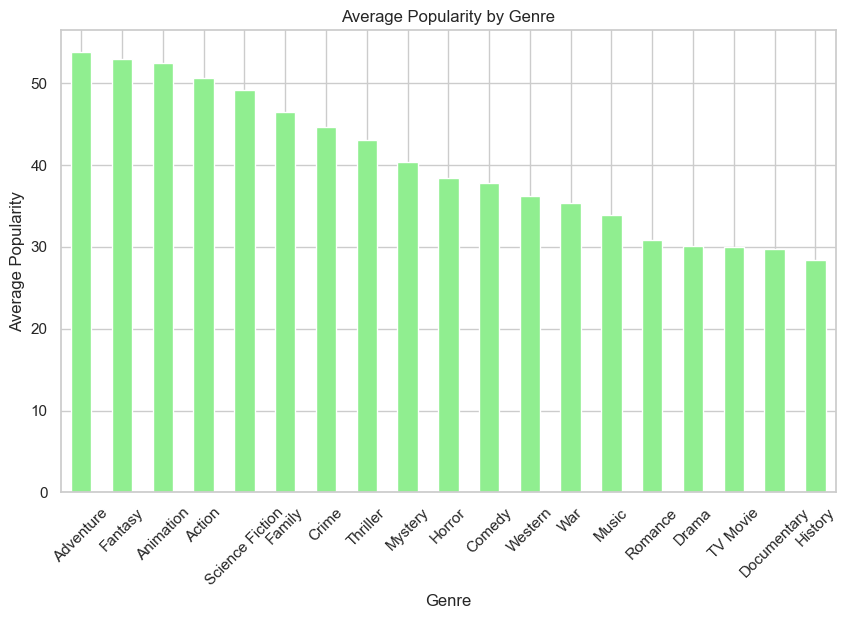

In [36]:
avg_popularity_by_genre = df.groupby('Genre')['Popularity'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
avg_popularity_by_genre.plot(kind='bar', color='lightgreen')
plt.title('Average Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.show()

8.5 Top 5 Movies by Vote Count: Identify the top 5 movies with the highest vote counts.


In [37]:
top_vote_count_movies = df.nlargest(5, 'Vote_Count')
print("Top 5 Movies by Vote Count:\n", top_vote_count_movies[['Title', 'Vote_Count', 'Genre']])

Top 5 Movies by Vote Count:
              Title  Vote_Count            Genre
1072     Inception       31077           Action
1073     Inception       31077  Science Fiction
1074     Inception       31077        Adventure
1277  Interstellar       27975        Adventure
1278  Interstellar       27975            Drama


8.6 Distribution of Vote Counts: Visualize the distribution of vote counts.

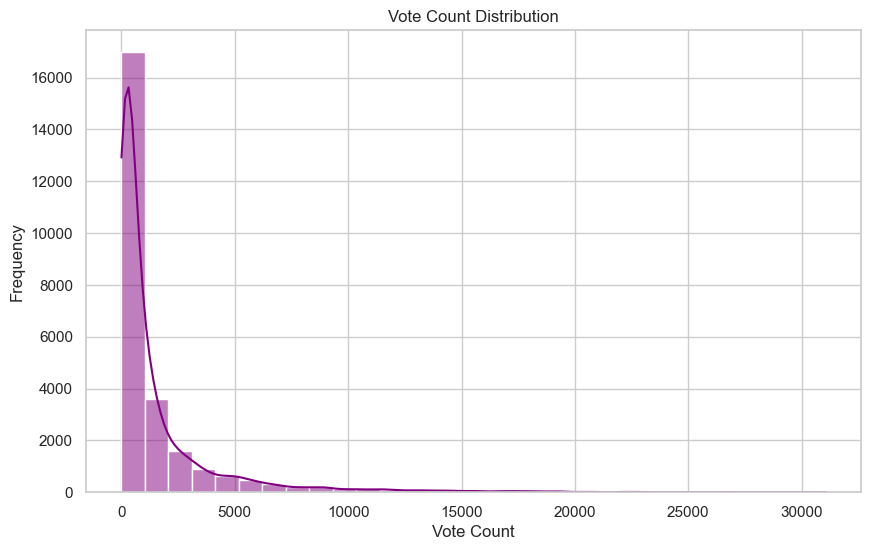

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Vote_Count'], bins=30, kde=True, color='purple')
plt.title('Vote Count Distribution')
plt.xlabel('Vote Count')
plt.ylabel('Frequency')
plt.show()

8.7 Analyze the Relationship Between Vote Count and Vote Average:

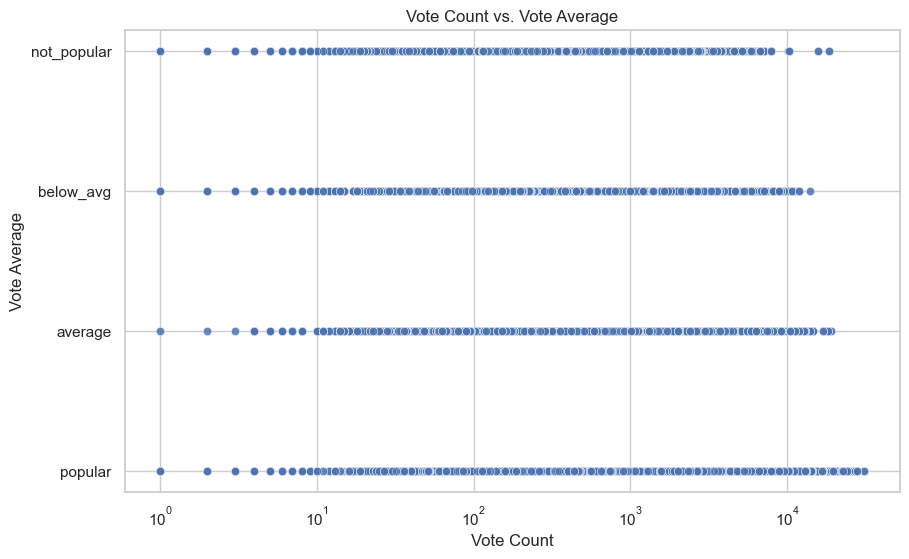

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Vote_Count', y='Vote_Average', data=df, alpha=0.6)
plt.title('Vote Count vs. Vote Average')
plt.xlabel('Vote Count')
plt.ylabel('Vote Average')
plt.xscale('log')  # Use log scale for better visualization
plt.show()

Conclusion
This expanded project now includes:

Genre Distribution: Understanding which genres are most prevalent.
Vote Average and Popularity: Insights into how movies are rated and their popularity.
Release Trends: Analyzing how the number of movies released has changed over time.
Correlation Analysis: Identifying relationships between different numerical features.
Top Genres Over Time: Understanding how genre popularity has evolved.
Average Popularity by Genre: Insights into which genres are more popular on average.
Vote Count Analysis: Understanding the distribution and relationship of vote counts and averages.